In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv(r"C:\Users\ADAM\Downloads\Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [38]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [39]:
data.isnull().sum()  

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [40]:
data['imports']=round((data.imports*data.gdpp)/100)
data['health']=round((data.health*data.gdpp)/100)
data['exports']=round((data.exports*data.gdpp)/100)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


In [41]:
import warnings
warnings.filterwarnings('ignore')

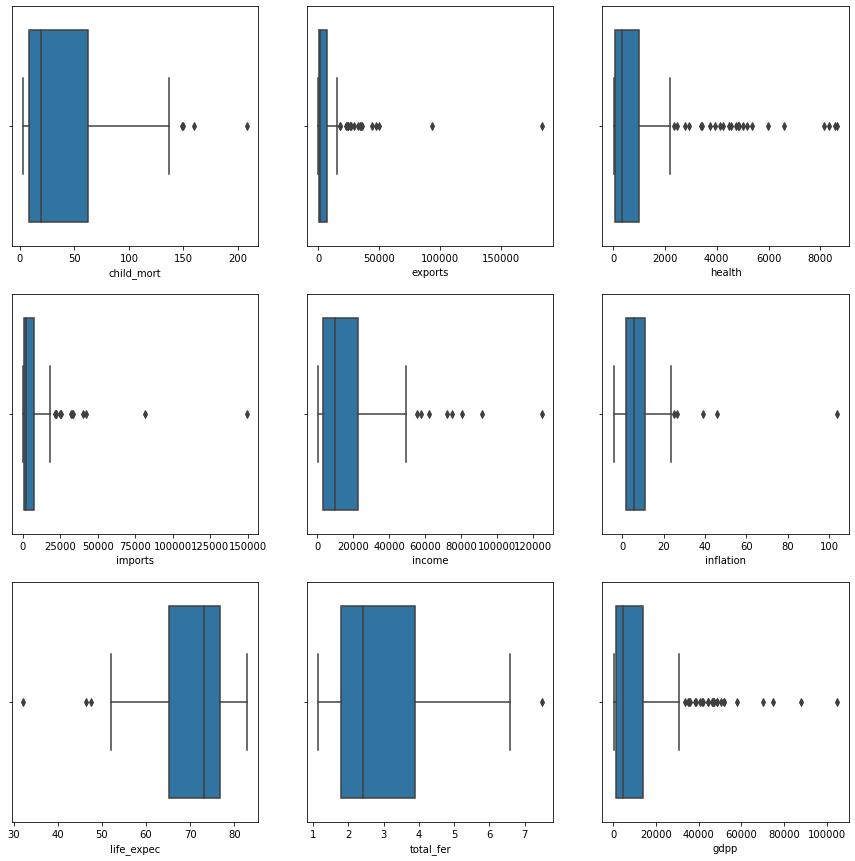

In [42]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x])
plt.show()

In [43]:
data1=data.copy()
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


In [44]:
feature=['imports','exports','health','income']
for i in feature:
    Q1 = data1[i].quantile(0.25)
    Q2 = data1[i].quantile(0.50)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 -(1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    data1[i]=np.where(data1[i]>upper_limit,upper_limit,np.where(data1[i]<lower_limit,lower_limit,data1[i]))

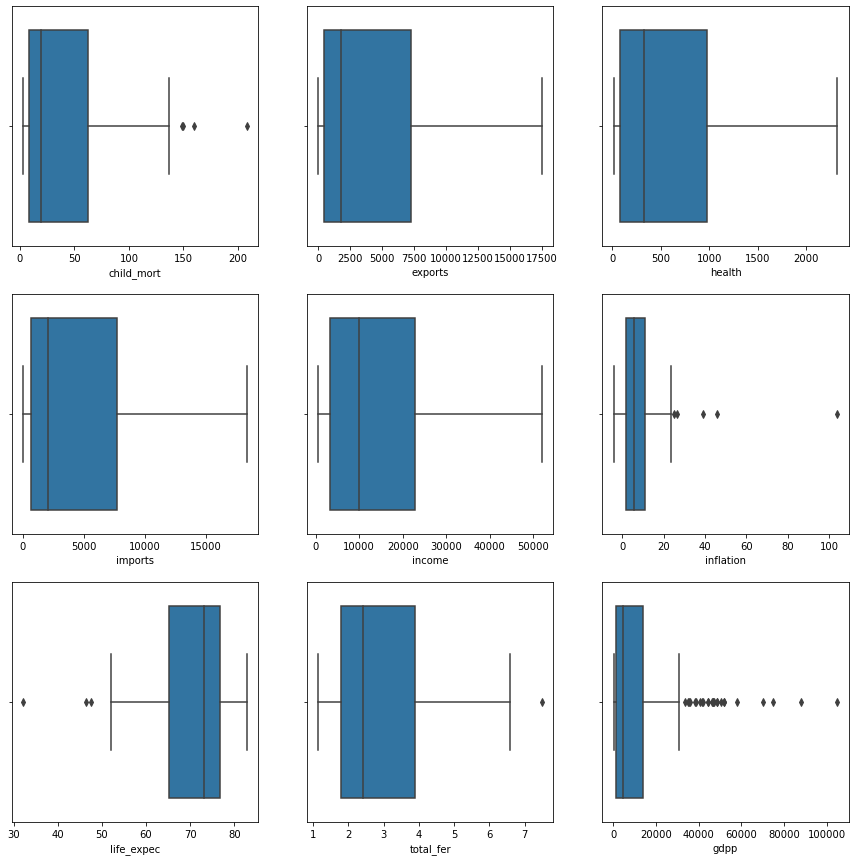

In [45]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data1.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data1[i], ax=ax[x])
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data1=data.drop('country',axis=1)
scaled_data = scalar.fit_transform(data1)

In [48]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

[1503.0000000000002, 942.2040077262791, 651.3798879024828, 479.76042843920095, 400.6601759237623, 348.24914982145026, 305.78853652269066, 268.9549970800511, 239.9729050168194, 221.28426542745532]


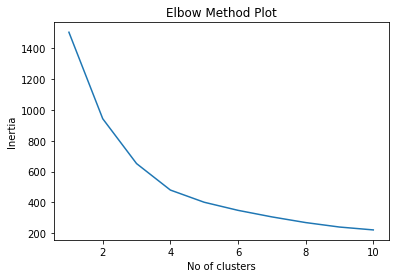

In [49]:
plt.plot(ks,inertia)
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [50]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)

In [51]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data1,model_kmeans.labels_, metric='euclidean',random_state=42)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.176


In [52]:
data1['KMean_ClusterID']= pd.Series(km)
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID
0,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553,0
1,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090,2
2,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460,2
3,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530,0
4,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200,2


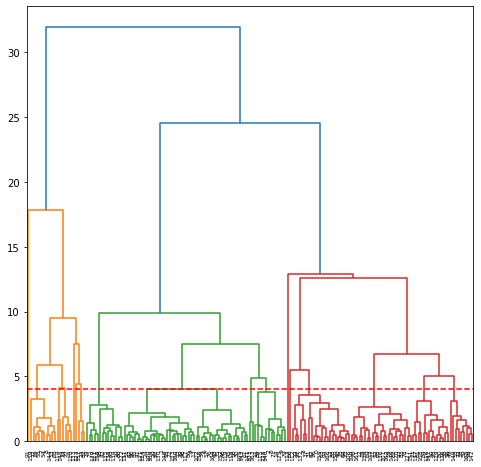

In [53]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(scaled_data,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="red",linestyles="dashed")
plt.show()

In [54]:
model_kmeans = KMeans(n_clusters=3,max_iter=50,random_state = 50)
model_kmeans.fit(scaled_data)
labels_sc = model_kmeans.predict(scaled_data)
print(labels_sc)

[2 1 1 2 1 1 1 0 0 1 1 1 1 1 1 0 1 2 1 1 1 2 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 2 1 2 1 0 1 0 1 1 1 1 2 2 1 1 0 0 2 2 1 0 2 1 1 1 2 2 1 2 1 0 1 1 1 2 0
 1 0 1 0 1 1 2 2 0 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 0 2 1 1 1 1 1 1 2 1 2 1 0
 0 2 2 0 1 2 1 1 1 1 1 1 0 1 1 2 1 1 2 1 1 2 0 1 1 2 2 1 0 1 1 2 1 0 0 1 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 2 2]


In [55]:
data1['AHC_ClusterID']= pd.Series(labels_sc)
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID,AHC_ClusterID
0,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553,0,2
1,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090,2,1
2,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460,2,1
3,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530,0,2
4,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200,2,1


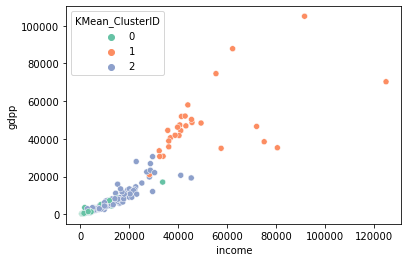

In [56]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='KMean_ClusterID', legend = 'full', data = data1, palette='Set2')
plt.show()

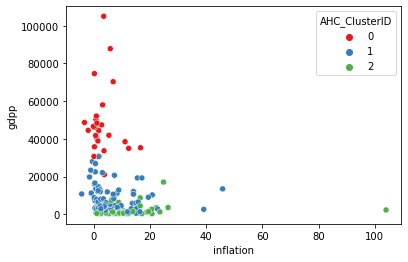

In [58]:
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='AHC_ClusterID', legend = 'full', data = data1, palette='Set1')
plt.show()

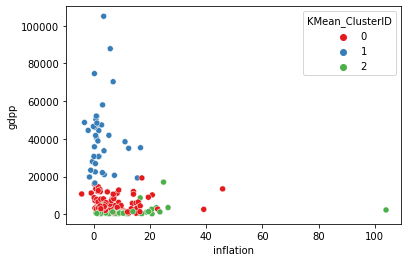

In [31]:
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='KMean_ClusterID', legend = 'full', data = data1, palette='Set1')
plt.show()

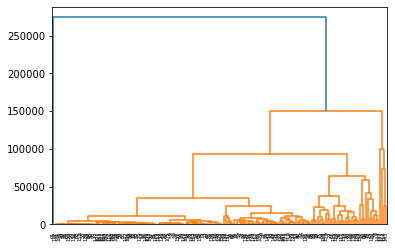

In [59]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
mergings_complete = linkage(data1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [62]:
df_hc = data.copy()
clusterCut = pd.Series(cut_tree(mergings_complete, n_clusters = 4).reshape(-1,))
df_hc_cut = pd.concat([df_hc, clusterCut], axis=1)
df_hc_cut.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hc_cut.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


In [67]:
df_hc_cut[df_hc_cut['cluster_labels']==0]['country']
df_hc_cut['cluster_labels'].value_counts()

0    162
2      3
1      1
3      1
Name: cluster_labels, dtype: int64

In [70]:
country_list = df_hc_cut[df_hc_cut['cluster_labels']==0].sort_values(by=["gdpp","income"],ascending=[True,True]) 
country_list = country_list.reset_index().drop('index',1)
country_list['country'].head(10)

0                     Burundi
1                     Liberia
2            Congo, Dem. Rep.
3                       Niger
4                Sierra Leone
5                  Madagascar
6                  Mozambique
7    Central African Republic
8                      Malawi
9                     Eritrea
Name: country, dtype: object